## C: Regularization Parameter
Intuition:

C determines the trade-off between achieving a wide margin and ensuring that most of the training data is classified correctly.
#### A smaller value of C creates a wider margin, which might misclassify more data points (higher bias, lower variance).

#### A larger value of C aims to classify all training examples correctly by selecting a smaller margin (lower bias, higher variance).

In [2]:
def plot_decision_function(model, ax):
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # Create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # Plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    
    # Plot support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')
    return ax


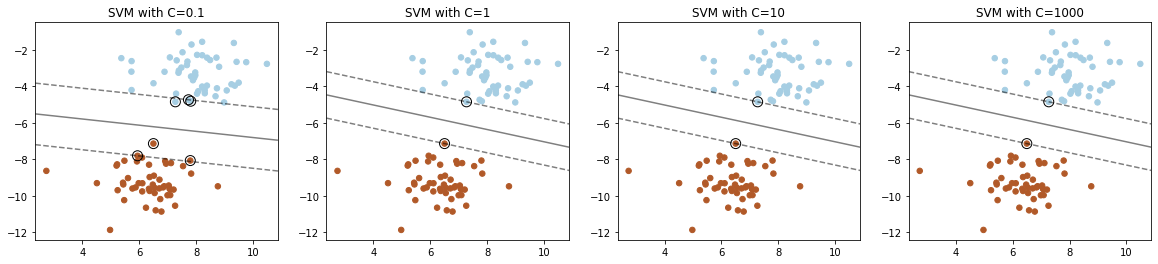

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

# Create a simple dataset
X, y = make_blobs(n_samples=100, centers=2, random_state=6)

# Train SVMs with different C values
C_values = [0.1, 1, 10, 1000]
models = [SVC(kernel='linear', C=C).fit(X, y) for C in C_values]

# Plot the decision boundaries for each model
fig, axes = plt.subplots(1, 4, figsize=(20, 4))

for model, ax, C in zip(models, axes, C_values):
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    
    # plot the decision function
    ax = plot_decision_function(model, ax)
    
    ax.set_title(f'SVM with C={C}')

plt.show()


## gamma: RBF Kernel Coefficient
For RBF Kernel:
gamma defines how far the influence of a single training example reaches.
Low values mean far reach, and high values mean close reach.
A small gamma will produce a more flexible decision boundary, whereas a large gamma will produce a more rigid boundary (can lead to overfitting).

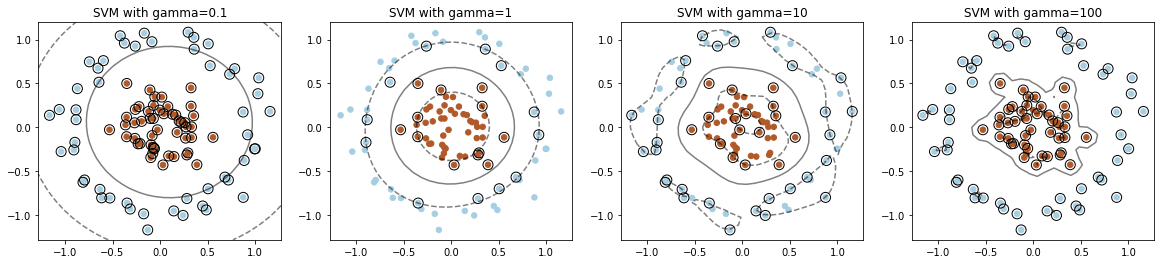

In [14]:
# Generate moon shaped data
X, y = make_moons(n_samples=100, noise=0.1, random_state=42)

# Generate donut shaped data
X, y = make_circles(n_samples=100, factor=0.3, noise=0.1, random_state=42)


gamma_values = [0.1, 1, 10, 100]
models = [SVC(kernel='rbf', gamma=gamma).fit(X, y) for gamma in gamma_values]

# Plot the decision boundaries for each model
fig, axes = plt.subplots(1, 4, figsize=(20, 4))

for model, ax, gamma in zip(models, axes, gamma_values):
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    
    # plot the decision function
    ax = plot_decision_function(model, ax)
    
    ax.set_title(f'SVM with gamma={gamma}')

plt.show()


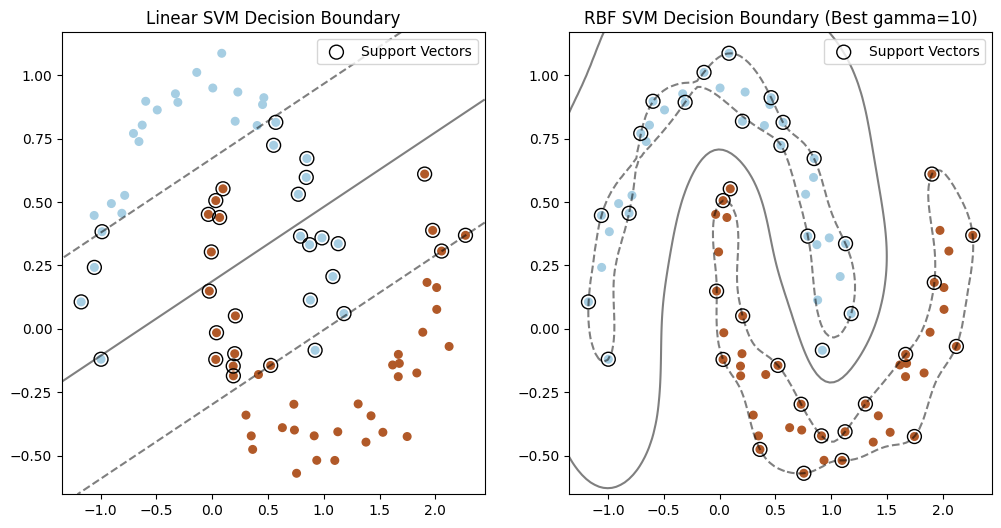

Best parameters: {'gamma': 10}
Best cross-validation score: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Confusion Matrix:
[[14  0]
 [ 0  6]]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Generate moon-shaped data
X, y = make_moons(n_samples=100, noise=0.1, random_state=42)

# Split the data into training and testing sets for later evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit Linear SVM
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train, y_train)

# Plot decision boundary for Linear SVM
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)
plt.scatter(linear_svm.support_vectors_[:, 0], linear_svm.support_vectors_[:, 1], s=100, 
            facecolors='none', edgecolors='k', label='Support Vectors')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to plot decision boundary
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
Z = linear_svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
plt.title('Linear SVM Decision Boundary')
plt.legend()

# Grid Search with Cross-Validation for RBF SVM
param_grid = {'gamma': [0.1, 1, 10, 100]}
grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_rbf_svm = grid_search.best_estimator_

# Plot decision boundary for the best RBF SVM
plt.subplot(1, 2, 2)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)
plt.scatter(best_rbf_svm.support_vectors_[:, 0], best_rbf_svm.support_vectors_[:, 1], s=100, 
            facecolors='none', edgecolors='k', label='Support Vectors')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
Z = best_rbf_svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
plt.title(f'RBF SVM Decision Boundary (Best gamma={grid_search.best_params_["gamma"]})')
plt.legend()

plt.show()

# Output best parameters and scores
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Additional Output: Classification report and confusion matrix for the best RBF SVM
y_pred = best_rbf_svm.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))